In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn.utils import shuffle
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import xgboost as xgb
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
import pickle
import gzip

Using TensorFlow backend.
/Applications/anaconda/lib/python2.7/site-packages/cffi/model.py:532: UserWarning: 'point_conversion_form_t' has no values explicitly defined; guessing that it is equivalent to 'unsigned int'
  % self._get_c_name())


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape

(595212, 59)

Training data consists of 59 columns and 595212 rows.

In [4]:
#checking for duplicates
train_df.drop_duplicates()
train_df.shape

(595212, 59)

There are no duplicates

In [5]:
# Checking number of rows and columns in test data
test_df.shape

(892816, 58)

The test data has all features as training data except for the target variable

In [6]:
# preview the data
train_df.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


/Applications/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


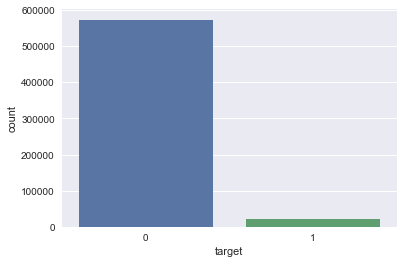

In [7]:
# Target varibale distribution
sns.countplot(x="target", data=train_df)

In [8]:
# Handling imbalanced dataset by undersampling
desired_apriori=0.10

# Get the indices per target value
idx_0 = train_df[train_df.target == 0].index
idx_1 = train_df[train_df.target == 1].index

# Get original number of records per target value
records_0 = len(train_df.loc[idx_0])
records_1 = len(train_df.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*records_1)/(records_0*desired_apriori)
undersampled_records_0 = int(undersampling_rate*records_0)

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_records_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train_df = train_df.loc[idx_list].reset_index(drop=True)
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df.shape

(216940, 59)

In [9]:
# preview the data
train_df.head(20)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,973462,1,1,1,1,0,0,0,1,0,...,3,2,3,4,0,0,0,1,0,0
1,94681,0,5,1,5,0,0,0,0,0,...,4,1,2,2,1,1,1,0,0,0
2,1340382,0,5,1,4,1,0,0,0,1,...,6,0,2,5,0,1,1,1,1,0
3,694804,0,7,4,10,1,0,0,0,0,...,2,0,2,6,0,1,0,1,1,1
4,694404,0,2,1,3,0,0,0,0,0,...,9,0,3,8,0,0,1,0,1,0
5,1045470,1,2,1,2,1,0,0,1,0,...,8,3,5,9,0,0,0,0,0,0
6,1337042,0,0,1,2,0,0,1,0,0,...,6,3,2,10,0,0,1,1,0,0
7,613580,0,2,1,2,1,0,0,1,0,...,7,1,2,8,0,1,0,0,1,0
8,234494,0,0,1,1,0,0,1,0,0,...,7,1,2,7,0,1,0,0,0,0
9,538538,0,2,1,3,1,0,0,1,0,...,4,2,3,7,0,1,1,0,0,0


In [10]:
# Frequency Distribution of each binary variable
bin_col = [col for col in train_df.columns if '_bin' in col]
for feature in bin_col:
    print train_df[feature].value_counts()

0    133002
1     83938
Name: ps_ind_06_bin, dtype: int64
0    159940
1     57000
Name: ps_ind_07_bin, dtype: int64
0    180791
1     36149
Name: ps_ind_08_bin, dtype: int64
0    177087
1     39853
Name: ps_ind_09_bin, dtype: int64
0    216859
1        81
Name: ps_ind_10_bin, dtype: int64
0    216559
1       381
Name: ps_ind_11_bin, dtype: int64
0    214838
1      2102
Name: ps_ind_12_bin, dtype: int64
0    216718
1       222
Name: ps_ind_13_bin, dtype: int64
1    142143
0     74797
Name: ps_ind_16_bin, dtype: int64
0    189788
1     27152
Name: ps_ind_17_bin, dtype: int64
0    183361
1     33579
Name: ps_ind_18_bin, dtype: int64
0    190382
1     26558
Name: ps_calc_15_bin, dtype: int64
1    135993
0     80947
Name: ps_calc_16_bin, dtype: int64
1    120445
0     96495
Name: ps_calc_17_bin, dtype: int64
0    154683
1     62257
Name: ps_calc_18_bin, dtype: int64
0    141188
1     75752
Name: ps_calc_19_bin, dtype: int64
0    183548
1     33392
Name: ps_calc_20_bin, dtype: int64


In [11]:
# Dropping ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin and ps_ind_12_bin as they are completely dominated by zeros
train_df = train_df.drop(['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin','ps_ind_13_bin'], axis=1)
test_df = test_df.drop(['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin','ps_ind_13_bin'], axis=1)

In [12]:
# checking for missing values
for feature in train_df.columns:
    missings = train_df[train_df[feature] == -1][feature].count()
    if missings > 0:
        print (str(feature)+"\t\t"+str(missings))

ps_ind_02_cat		103
ps_ind_04_cat		51
ps_ind_05_cat		2256
ps_reg_03		38580
ps_car_01_cat		62
ps_car_02_cat		2
ps_car_03_cat		148367
ps_car_05_cat		96026
ps_car_07_cat		4431
ps_car_09_cat		230
ps_car_11		1
ps_car_14		15726


In [13]:
# Dropping ps_car_03_cat and ps_car_05_cat as they have a large proportion of records with missing values
train_df = train_df.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis=1)
test_df = test_df.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis=1)

In [14]:
# Replacing missing values of features other than categorical
# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train_df['ps_reg_03'] = mean_imp.fit_transform(train_df[['ps_reg_03']]).ravel()
train_df['ps_car_14'] = mean_imp.fit_transform(train_df[['ps_car_14']]).ravel()
train_df['ps_car_11'] = mode_imp.fit_transform(train_df[['ps_car_11']]).ravel()

In [15]:
train_df.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_04_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11         float64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01        float64
ps_calc_02        float64
ps_calc_03        float64
ps_calc_04          int64
ps_calc_05          int64
ps_calc_06  

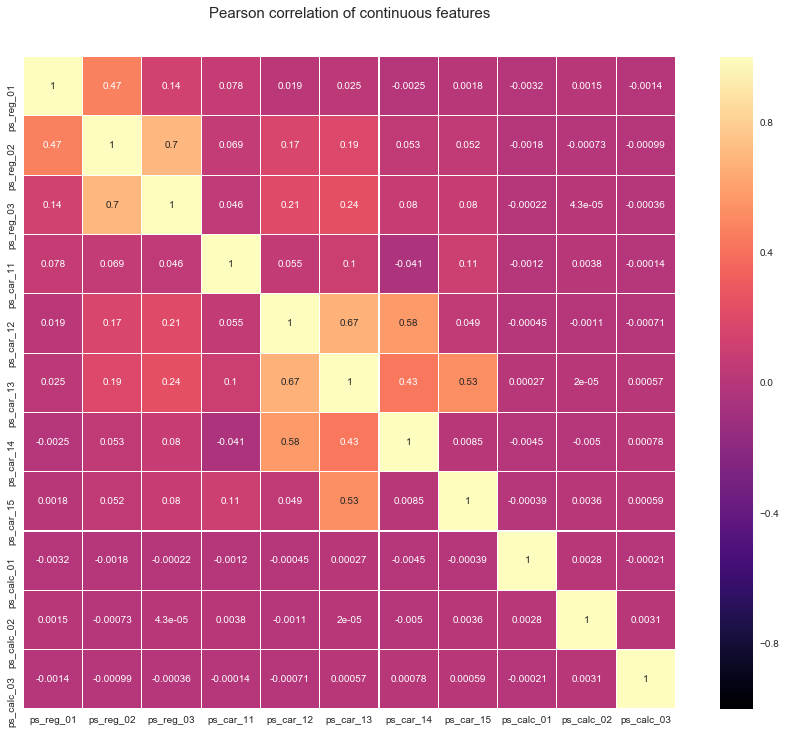

In [16]:
train_float = train_df.select_dtypes(include=['float64'])
# correlation matrix for float features
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

Pair of higly correlated features: (ps_reg_02, ps_reg_03) (ps_car_12, ps_car_13) (ps_car_12, ps_car_14) (ps_car_13, ps_car_15)

Will treat the higly correlated features later while fitting models

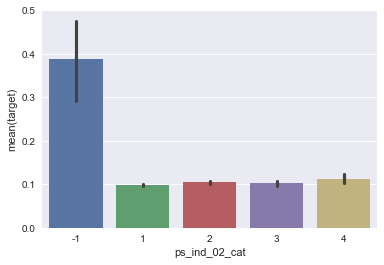

In [17]:
# plotting ps_ind_02_cat against taget variable
sns.barplot(x="ps_ind_02_cat", y="target", data=train_df)

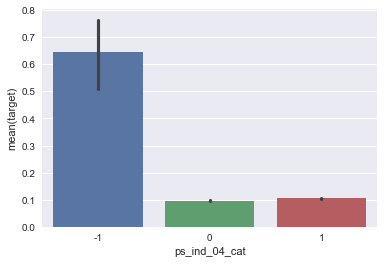

In [18]:
# plotting ps_ind_04_cat against taget variable
sns.barplot(x="ps_ind_04_cat", y="target", data=train_df)

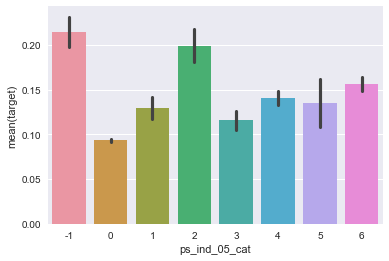

In [19]:
# plotting ps_ind_05_cat against taget variable
sns.barplot(x="ps_ind_05_cat", y="target", data=train_df)

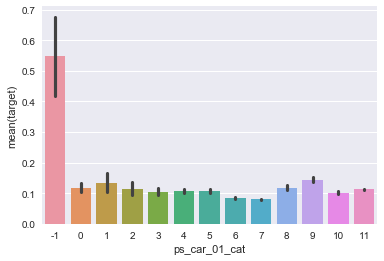

In [20]:
# plotting ps_car_01_cat against taget variable
sns.barplot(x="ps_car_01_cat", y="target", data=train_df)

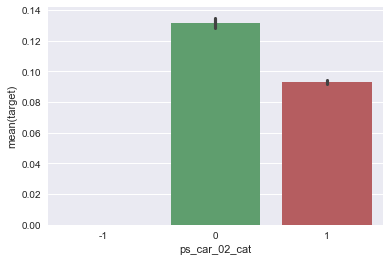

In [21]:
# plotting ps_car_02_cat against taget variable
sns.barplot(x="ps_car_02_cat", y="target", data=train_df)

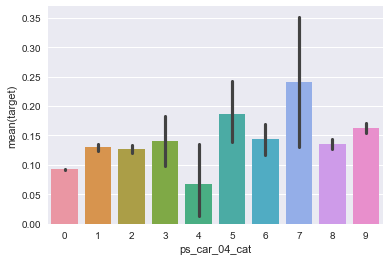

In [22]:
# plotting ps_car_04_cat against taget variable
sns.barplot(x="ps_car_04_cat", y="target", data=train_df)

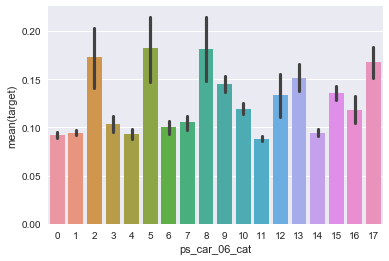

In [23]:
# plotting ps_car_06_cat against taget variable
sns.barplot(x="ps_car_06_cat", y="target", data=train_df)

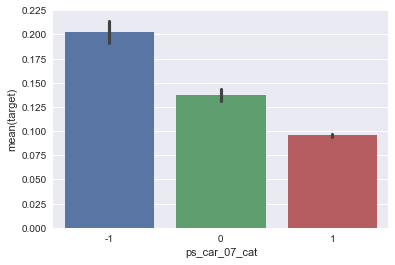

In [24]:
# plotting ps_car_07_cat against taget variable
sns.barplot(x="ps_car_07_cat", y="target", data=train_df)

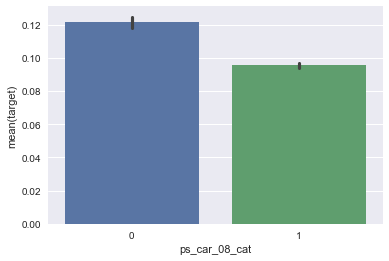

In [25]:
# plotting ps_car_08_cat against taget variable
sns.barplot(x="ps_car_08_cat", y="target", data=train_df)

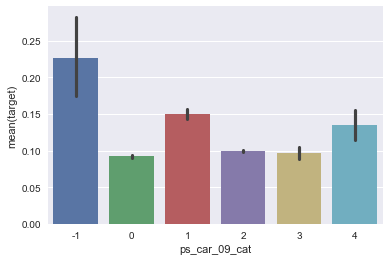

In [26]:
# plotting ps_car_09_cat against taget variable
sns.barplot(x="ps_car_09_cat", y="target", data=train_df)

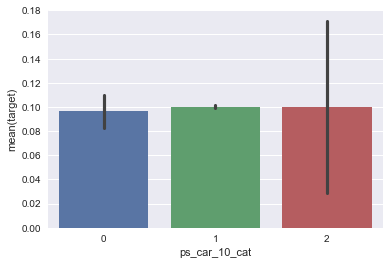

In [27]:
# plotting ps_car_10_cat against taget variable
sns.barplot(x="ps_car_10_cat", y="target", data=train_df)

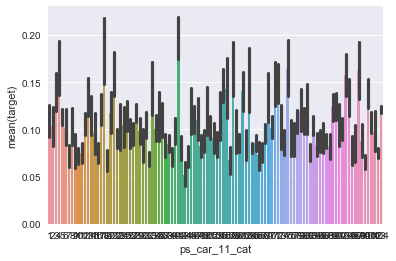

In [28]:
# plotting ps_car_11_cat against taget variable
sns.barplot(x="ps_car_11_cat", y="target", data=train_df)

In [29]:
# Dropping irrevalent feature
train_df = train_df.drop(['ps_car_10_cat'], axis=1)
test_df = test_df.drop(['ps_car_10_cat'], axis=1)

In [30]:
# checking for missing values in test data
for feature in test_df.columns:
    missings = test_df[test_df[feature] == -1][feature].count()
    if missings > 0:
        print (str(feature)+"\t\t"+str(missings))

ps_ind_02_cat		307
ps_ind_04_cat		145
ps_ind_05_cat		8710
ps_reg_03		161684
ps_car_01_cat		160
ps_car_02_cat		5
ps_car_07_cat		17331
ps_car_09_cat		877
ps_car_11		1
ps_car_14		63805


In [31]:
# Replacing missing values of features other than categorical
# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
test_df['ps_reg_03'] = mean_imp.fit_transform(test_df[['ps_reg_03']]).ravel()
test_df['ps_car_14'] = mean_imp.fit_transform(test_df[['ps_car_14']]).ravel()
test_df['ps_car_11'] = mode_imp.fit_transform(test_df[['ps_car_11']]).ravel()

In [32]:
X_train = train_df.drop(["target","id"], axis=1)
Y_train = train_df["target"]
X_test  = test_df.drop("id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((216940, 50), (216940,), (892816, 50))

In [33]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# calculating the coefficient of the features
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,ps_ind_04_cat,0.140274
12,ps_ind_16_bin,0.107355
29,ps_car_14,0.092485
14,ps_ind_18_bin,0.088650
26,ps_car_11,0.083064
27,ps_car_12,0.064218
6,ps_ind_06_bin,0.056259
7,ps_ind_07_bin,0.046649
15,ps_reg_01,0.039466
2,ps_ind_02_cat,0.038873


In [35]:
# Dropping less important feature from each pair of highly correlated feature  
train_df = train_df.drop(["ps_reg_03","ps_car_12","ps_car_15"], axis=1)
test_df = test_df.drop(["ps_reg_03", "ps_car_12", "ps_car_15"], axis=1)
X_train = train_df.drop(["target","id"], axis=1)
Y_train = train_df["target"]
X_test  = test_df.drop("id", axis=1).copy()
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape, Y_train.shape, X_test.shape

((216940, 47), (216940,), (892816, 47))

In [36]:
# Decreasing size of dataset
X_train_small=X_train[:25000]
Y_train_small=Y_train[:25000]
X_train_small.shape, Y_train_small.shape

((25000, 47), (25000,))

In [37]:
# creating dictionary to save on disk
modified_data={}
modified_data["X_train_small"]=X_train_small
modified_data["Y_train_small"]=Y_train_small
modified_data["X_train"]=X_train
modified_data["Y_train"]=Y_train
modified_data["X_test"]=X_test

In [38]:
# Saving modified data to disk
path_to_model='./'
f = gzip.open(path_to_model+'modified_data.pklz','wb')
pickle.dump(modified_data,f)
f.close()